## Lab3
#### Zadanie 1
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. (1 pkt)

In [1]:
using LinearAlgebra
using Plots
using Interpolations
using Polynomials

function lagrangeInterpolation(args, values)
    n = length(args)
    
    function lagrangeInterpolant(x)
        output = 0
        lagrangePolynomials = ones(n)
        for i in 1:n
            for j in 1:n
                if j != i
                    lagrangePolynomials[i] *= (x - args[j]) / (args[i] - args[j])
                end
            end
        end
        output = dot(lagrangePolynomials, values)
        return output
    end
    
    return lagrangeInterpolant
end

lagrangeInterpolation (generic function with 1 method)

In [2]:
numberOfPoints = 8
testXs = rand(numberOfPoints) * 5
testYs = rand(numberOfPoints)
interFunc = lagrangeInterpolation(testXs, testYs)

(::var"#lagrangeInterpolant#1"{Vector{Float64}, Vector{Float64}, Int64}) (generic function with 1 method)

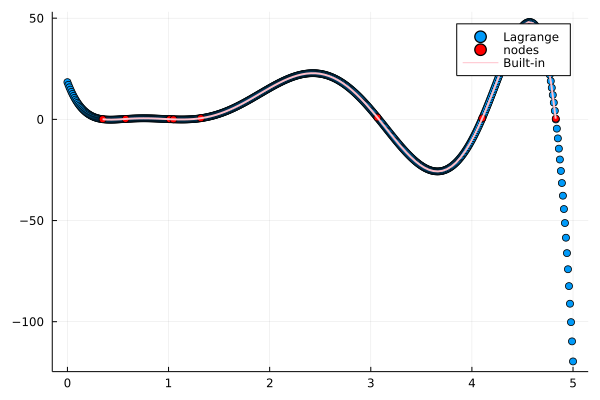

In [3]:
lagrangeXs = 0:0.01:5
lagrangeYs = [interFunc(x) for x in lagrangeXs]
f = fit(testXs, testYs)
scatter(lagrangeXs, lagrangeYs, label = "Lagrange")
scatter!(testXs, testYs, label="nodes", color="red")
plot!(f, extrema(testXs)..., label="Built-in", linewidth=2, color="pink")

#### Zadanie 2
Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ :

* napisać funkcję NewtonInterpolation, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" newt
* napisać funkcję która wylicza wartość wielomianu dla obiektu newt w punkcie x za pomocą schematu Hornera dla postaci Newtona (2 pkt)



In [4]:
function newtonInterpolation(args, values)
    n = length(args)
    
    function newtonInterpolant(x)
        deltas = zeros((2 * n - 1, n))
        starts = zeros((2 * n - 1, n))
        ends = zeros((2 * n - 1, n))
        idx = 1

        for i = 1:2:(2 * n)
            deltas[i, 1] = values[idx]
            starts[i, 1] = args[idx]
            ends[i, 1] = args[idx]
            idx += 1
        end
        for j = 2:n
            for i = j:2:(2 * n - j)
                starts[i, j] = starts[i - 1, j - 1]
                ends[i, j] = ends[i + 1, j - 1]
                deltas[i,j] = (deltas[i + 1, j - 1] - deltas[i - 1, j - 1]) / (ends[i, j] - starts[i, j])
            end
        end
        
        solution = deltas[n, n]
        for i = (n - 1):-1:1
            solution = solution * (x - args[i]) + deltas[i, i]
        end
        return solution
    end
    
    return newtonInterpolant
end

newtonInterpolation (generic function with 1 method)

In [5]:
newtonInterFunc = newtonInterpolation(testXs, testYs)

(::var"#newtonInterpolant#4"{Vector{Float64}, Vector{Float64}, Int64}) (generic function with 1 method)

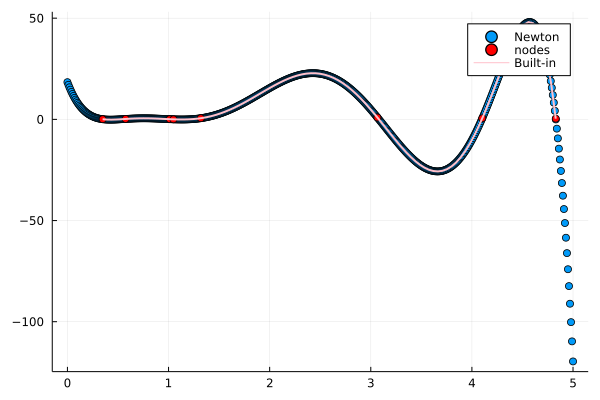

In [6]:
newtonXs = 0:0.01:5
newtonYs = [newtonInterFunc(x) for x in newtonXs]
f = fit(testXs, testYs)
scatter(newtonXs, newtonYs, label = "Newton")
scatter!(testXs, testYs, label="nodes", color="red")
plot!(f, extrema(testXs)..., label="Built-in", linewidth=2, color="pink")

#### Zadanie 3
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? (1 pkt)

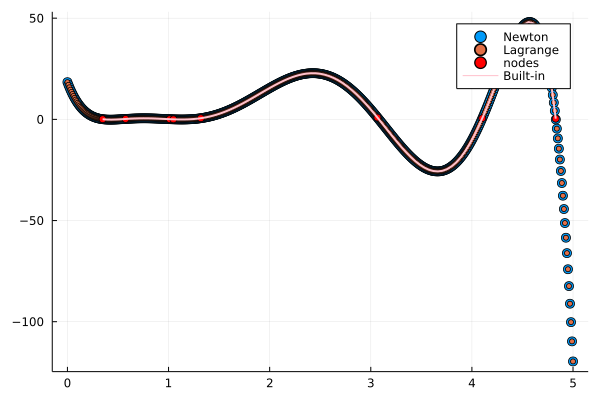

In [7]:
scatter(newtonXs, newtonYs, label = "Newton", markersize=5)
scatter!(lagrangeXs, lagrangeYs, label = "Lagrange", markersize=3)
scatter!(testXs, testYs, label="nodes", color="red")
plot!(f, extrema(testXs)..., label="Built-in", linewidth=2, color="pink")

Nie zauważono żadnych różnic, wykresy się pokrywają.

#### Zadanie 4
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. Jako narzędzie do analizy danych użyć Julia DataFrames (2 pkt)

In [8]:
function LagrangeTime(n)
    args = rand(n)
    values = rand(n)
    @elapsed lagrangeInterpolation(args, values)
end

function NewtonPolynomialTime(n)
    args = rand(n)
    values = rand(n)
    @elapsed newtonInterpolation(args, values)
end

function NewtonValueTime(n)
    args = rand(n)
    values = rand(n)
    interpolant = newtonInterpolation(args, values)
    @elapsed interpolant(args[1])
end

function builtInPolynomialTime(n)
    args = rand(n)
    values = rand(n)
    @elapsed fit(args, values)
end

function builtInValueTime(n)
    args = rand(n)
    values = rand(n)
    f = fit(args, values)
    @elapsed f(args[1])
end

# kompilacja funkcji

LagrangeTime(1)
NewtonPolynomialTime(1)
NewtonValueTime(1)
builtInPolynomialTime(1)
builtInValueTime(1)

2.0e-7

In [9]:
using DataFrames

dataframe= DataFrame(Number = 1, Operation="LagrangeTime", Time = LagrangeTime(1))
delete!(dataframe, 1)

functions = [LagrangeTime, NewtonPolynomialTime, NewtonValueTime, builtInPolynomialTime, builtInValueTime]
texts = ["LagrangeTime", "NewtonPolynomialTime", "NewtonValueTime", "builtInPolynomialTime", "builtInValueTime"]

for n = 10:100:5000
    for i in 1:5
        func = functions[i]
        text = texts[i]
        for a = 1:10
            push!(dataframe, [n, text, func(n)])
        end
    end
end

dataframe

,Number,Operation,Time
,Int64,String,Float64
1,10,LagrangeTime,1.0e-7
2,10,LagrangeTime,1.0e-7
3,10,LagrangeTime,0.0
4,10,LagrangeTime,0.0
5,10,LagrangeTime,1.0e-7
6,10,LagrangeTime,0.0
7,10,LagrangeTime,0.0
8,10,LagrangeTime,1.0e-7
9,10,LagrangeTime,0.0


In [10]:
grouped = groupby(dataframe, [:Operation, :Number])

,Number,Operation,Time
,Int64,String,Float64
1,10,LagrangeTime,1.0e-7
2,10,LagrangeTime,1.0e-7
3,10,LagrangeTime,0.0
4,10,LagrangeTime,0.0
5,10,LagrangeTime,1.0e-7
6,10,LagrangeTime,0.0
7,10,LagrangeTime,0.0
8,10,LagrangeTime,1.0e-7
9,10,LagrangeTime,0.0


In [11]:
using Statistics

aggregated = combine(grouped, "Time" => mean, "Time" => std)

,Operation,Number,Time_mean,Time_std
,String,Int64,Float64,Float64
1,LagrangeTime,10,5.0e-8,5.27046e-8
2,NewtonPolynomialTime,10,2.0e-8,4.21637e-8
3,NewtonValueTime,10,2.68e-6,2.86698e-6
4,builtInPolynomialTime,10,9.1e-7,1.05877e-6
5,builtInValueTime,10,5.0e-8,5.27046e-8
6,LagrangeTime,110,5.0e-8,5.27046e-8
7,NewtonPolynomialTime,110,4.0e-8,5.16398e-8
8,NewtonValueTime,110,0.00015042,3.84919e-5
9,builtInPolynomialTime,110,2.095e-5,5.06074e-7


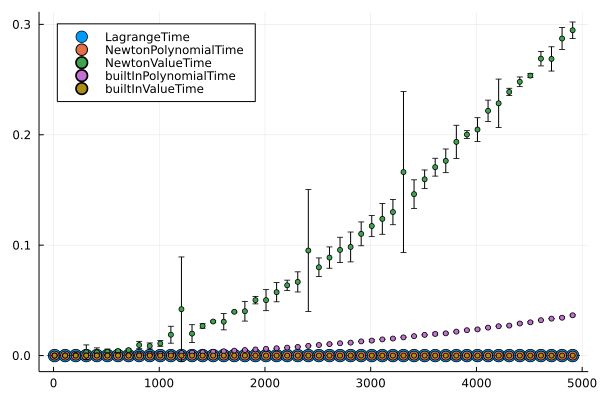

In [12]:
scatter(aggregated.Number, aggregated.Time_mean,yerror=aggregated.Time_std, group=aggregated.Operation, 
        legend=:topleft, markersize=[7 5 3 3 3])

#### Zadanie 5
Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.(1 pkt)

In [13]:
function nevilleInterpolation(args, values)
    n = length(args)
    
    function nevilleInterpolant(x)
        matrix = zeros((n, n))
        for i = 1:n
            matrix[i, 1] = values[i]
        end
        for j in 2:n
            for i in j:n
                nominator = (x - args[i - j + 1]) * matrix[i, j - 1] - (x - args[i]) * matrix[i - 1, j - 1]
                denominator = args[i] - args[i - j + 1]
                matrix[i,j] = nominator / denominator
            end
        end
        return matrix[n, n]
    end
    
    return nevilleInterpolant
end

nevilleInterpolation (generic function with 1 method)

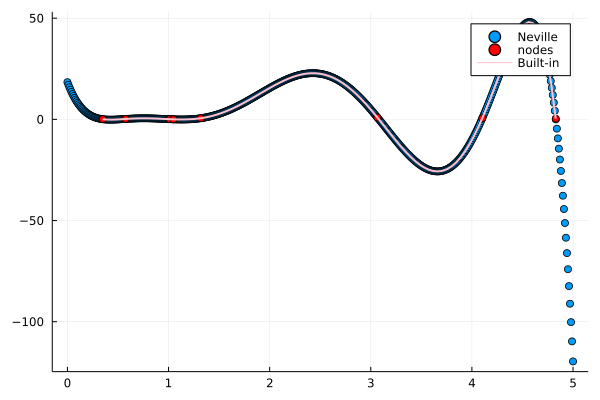

In [14]:
nevilleInterFunc = nevilleInterpolation(testXs, testYs)
nevilleXs = 0:0.01:5
nevilleYs = [nevilleInterFunc(x) for x in nevilleXs]
f = fit(testXs, testYs)
scatter(nevilleXs, nevilleYs, label = "Neville")
scatter!(testXs, testYs, label="nodes", color="red")
plot!(f, extrema(testXs)..., label="Built-in", linewidth=2, color="pink")

#### Zadanie 6
Poeksperymentować z interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane), narysować wykresy i porównać z wykresami interpolacji wielomianowej. Zademonstrować efekt Rungego (1 pkt). 

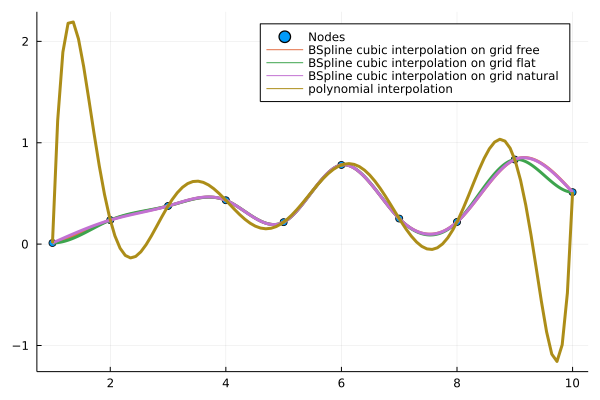

In [18]:
xs = 1:1:10
xs_dense = 1:0.01:10
ys = [rand() for x in xs]

scatter(xs, ys, label="Nodes")

interpolant = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ys_dense =[interpolant(x) for x in xs_dense]
plot!(xs_dense,ys_dense, label="BSpline cubic interpolation on grid free", linewidth=3)

interpolant = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ys_dense =[interpolant(x) for x in xs_dense]
plot!(xs_dense,ys_dense, label="BSpline cubic interpolation on grid flat", linewidth=3)

interpolant = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ys_dense =[interpolant(x) for x in xs_dense]
plot!(xs_dense,ys_dense, label="BSpline cubic interpolation on grid natural", linewidth=3)

f = fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation", linewidth=3)

**Efekt Rungego** - pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów.

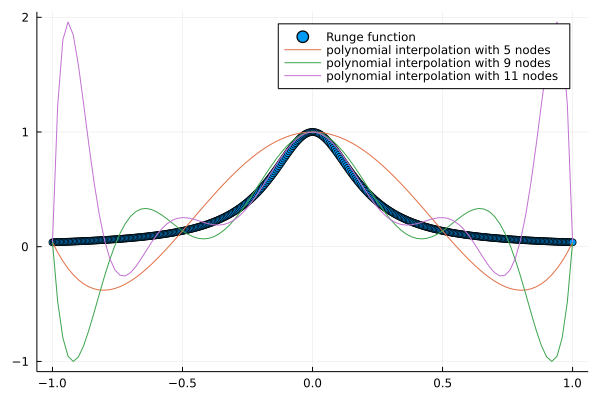

In [16]:
function runge(x)
    return 1 / (1 + 25 * x * x)
end

xs = -1:0.005:1.0
ys = [runge(x) for x in xs]

scatter(xs, ys, label="Runge function")

interX = -1:0.5:1
interY = [runge(x) for x in interX]
f = fit(interX, interY)
plot!(f,  extrema(interX)..., label="polynomial interpolation with 5 nodes")

interX = -1:0.25:1
interY = [runge(x) for x in interX]
f = fit(interX, interY)
plot!(f,  extrema(interX)..., label="polynomial interpolation with 9 nodes")

interX = -1:0.2:1
interY = [runge(x) for x in interX]
f = fit(interX, interY)
plot!(f,  extrema(interX)..., label="polynomial interpolation with 11 nodes")

Dla 17 węzłów różnica jest jeszcze bardziej widoczna:

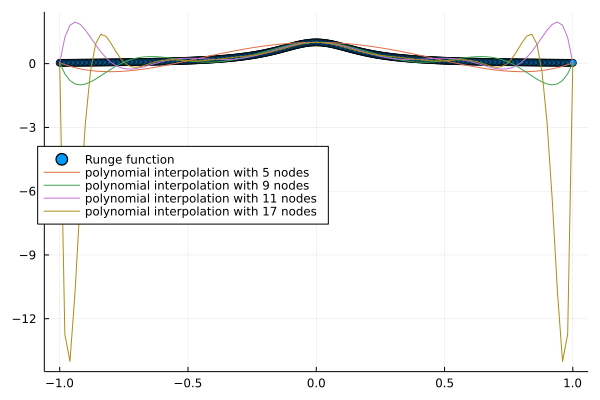

In [17]:
interX = -1:0.125:1
interY = [runge(x) for x in interX]
f = fit(interX, interY)
plot!(f,  extrema(interX)..., label="polynomial interpolation with 17 nodes", legend=:inside)